<a href="https://colab.research.google.com/github/tohver/Data_Science/blob/master/central_limit_theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Central Limit Theorem

## Load dependencies

In [1]:
import numpy as np
import seaborn as sns
import statistics as stat

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Simulating a normally-distributed population

In [2]:
x = np.random.normal(size=10000) # at default parameters, will be "standard" normal distribution

In [3]:
x[:10]

array([ 0.560767  ,  0.00654439,  0.51788222,  1.51268676, -1.23017867,
        0.20093325,  0.99389136, -1.21743829, -0.20501369, -0.22972332])

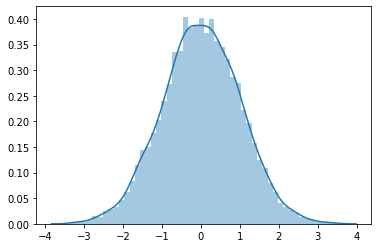

In [7]:
sns.distplot(x)
# distplot default:
# kernel density estimate = True (the blue curve around the dist.)

a standard normal distribution  
with   
**mean = 0  
std = 1**

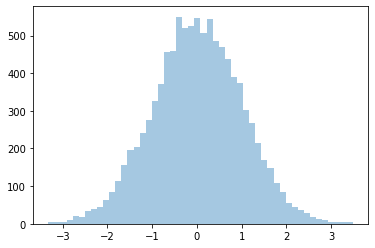

In [8]:
sns.distplot(x, kde=False)

## Sampling from the normally-distributed population

In [9]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([-0.08837149,  0.27680773,  0.91870497,  1.83050754,  1.33315369,
       -0.03841563, -0.18943252, -0.07019629,  2.53143075,  1.06773954])

In [10]:
 stat.mean(x_sample)

0.7571928300645128

In [15]:
print(stat.mean(x))
print(x.mean())
print(np.mean(x))

0.011052131455348795
0.011052131455348793
0.011052131455348793


In [16]:
def sample_mean_calculator(population_array, sample_size, n_samples):
  '''
  population_array - z czego bierzemy próbki
  n_sample: how many samples
  sample_size = the size of each sample
  '''
  sample_means = []
  for i in range(n_samples):
    sample = np.random.choice(population_array, size=sample_size, replace=False)
    sample_mean = stat.mean(sample)
    sample_means.append(sample_mean)
  return sample_means

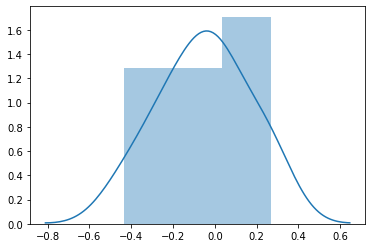

In [17]:
_ = sns.distplot(sample_mean_calculator(x, 10, 10))

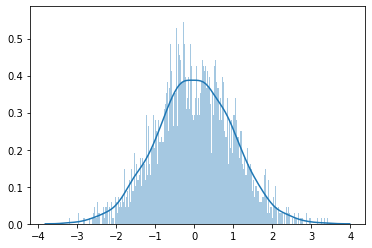

In [19]:
_ = sns.distplot(x, 1000, 10)

###### The more samples we take, the more likely that the sampling distribution of the means will be normally-distributed: 

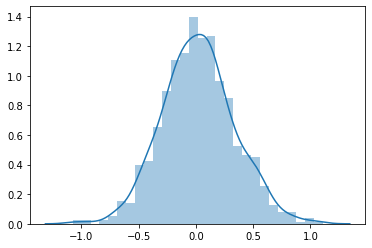

In [18]:
_ = sns.distplot(sample_mean_calculator(x, 10, 1000))

###### The larger the sample, the tighter the sample means will tend to be around the population mean  
and   
the variance of the distribution is lower (1.0 vs. 0.1)

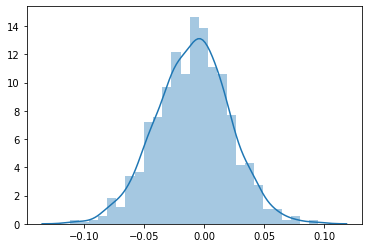

In [ ]:
_ = sns.distplot(sample_mean_calculator(x, 1000, 1000))

## Sampling from a skewed population

In [20]:
from scipy.stats import skewnorm

In [21]:
s = skewnorm.rvs(12, size=10000)

In [22]:
s[:50]

array([ 1.25275897,  0.28808445,  0.35143626,  0.18826063,  1.22294874,
        0.22467525,  0.42496786,  0.82563658,  2.30850399,  0.85627765,
        0.59558883,  0.26338203,  0.50455974,  0.63310044,  0.15923561,
        1.61870634,  0.16653233,  0.42887902,  1.2628898 ,  1.60257877,
        0.05576653,  1.93727066,  0.22407883,  0.63690902,  0.81939662,
       -0.17506876,  0.24027585,  0.63999358,  0.84430588,  0.85198398,
        1.21336472,  0.89849859,  1.48978532,  1.33753802,  1.8626804 ,
        1.22219449,  0.32058492,  1.0205257 ,  0.32471637,  0.71194485,
        0.12636614,  1.99244155,  0.0802214 ,  1.295542  ,  1.50230458,
        0.90789131,  0.63200306,  0.61931   ,  0.0746647 ,  0.78170882])

In [23]:
stat.mean(s)

0.7949612296408796

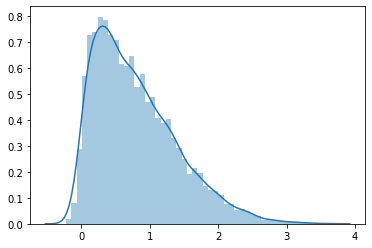

In [24]:
sns.distplot(s)

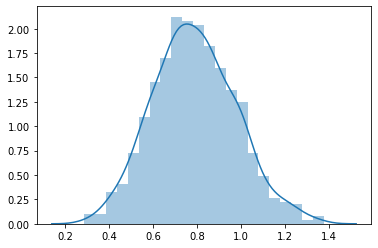

In [25]:
_ = sns.distplot(sample_mean_calculator(s, 10, 1000))

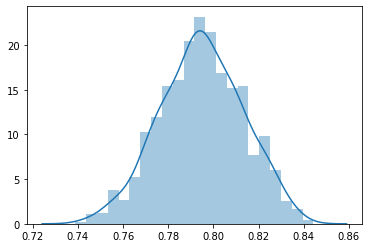

In [26]:
_ = sns.distplot(sample_mean_calculator(s, 1000, 1000))

## Sampling from a multimodal distribution

In [ ]:
m = np.concatenate((np.random.normal(size=10000), np.random.normal(loc = 4.0, size=10000)))

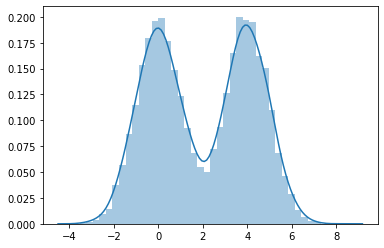

In [ ]:
_ = sns.distplot(m)

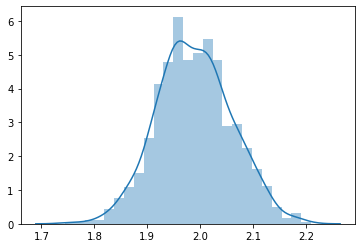

In [ ]:
_ = sns.distplot(sample_mean_calculator(m, 1000, 1000))

## Sampling means from *any* distribution produces a normal sampling distribution

###### Even when sampling from a uniform population:

In [ ]:
u = np.random.uniform(size=10000)

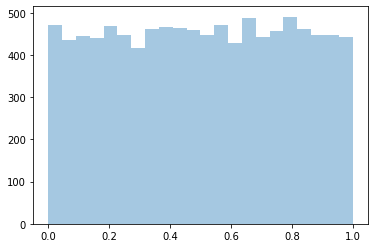

In [ ]:
_ = sns.distplot(u, kde=False)

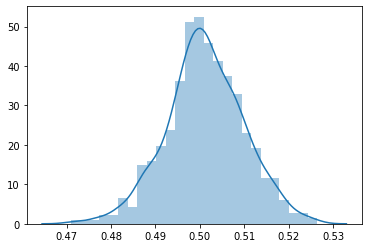

In [ ]:
_ = sns.distplot(sample_mean_calculator(u, 1000, 1000))

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to run statistical tests that are configured for normal distributions. All of the most popular statistical tests are configured this way.

As an example of such a statistical test, the "*t*-test" allows us to infer whether two samples come from different populations (say, an experimental group and a control group). Thanks to the central limit theorem, we can use this test *even if we have no idea what the underlying distribution of the population is*, which is most of the time.